# CS989 - Big Data Fundamental
## Student: Nguyen Thi Thu
## ID: ntb21167

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn import metrics

### 2. Dataset

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
#df.head()

In [3]:
## investigate dataset

In [4]:
df.isnull().sum()
## Income has 24 missing values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Manipulate dataset

In [5]:
df=df.set_index('ID')
#fill NA values in Income column
df=df.dropna(axis=0)
# transfer Year_birth into Age
df['Age']=2021-df['Year_Birth']
#group marrital status into 2 group: single and relationship
mar_stat = ['Single', 'Widow', 'Divorced', 'Alone', 'Absurd', 'YOLO']
df['Marital_Status2'] = df['Marital_Status']
df['Marital_Status2'] = np.where(df['Marital_Status'].isin(mar_stat), 'Single', df['Marital_Status2'])
df['Marital_Status2'] = np.where(df['Marital_Status'].isin(['Married', 'Together']), 'Relationship', df['Marital_Status2'])
#group 2 columns kidhome and teenhome into a single column : kids
df['Kids'] = df['Kidhome'] + df['Teenhome']#group 6 columns about campaign acceptance into a single column: Accepted_camp
df['Accepted_camp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Marital_Status2,Kids,Accepted_camp
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,3,11,1,64,Single,0,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,3,11,0,67,Single,2,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,3,11,0,56,Relationship,0,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,3,11,0,37,Relationship,1,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,3,11,0,40,Relationship,1,0


In [6]:
#drop unrealated or non-useful columns#drop unrealated or non-useful columns
df= df.drop(['Year_Birth', 'Kidhome','Teenhome', 'Dt_Customer', 'Recency', 
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
             'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],axis=1)
#rename columns
df.columns=['Education', 'Marital_Status', 'Income', 'Wines', 'Fruits','Meat', 'Fish', 'Sweet','Gold', 'Deal_Purchases', 'Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits','Age','Marital_Status2', 'Kids', 'Accepted_camp']
# reorder the position of columns so that we can see 4 groups of information: customer profile, product,place,marketing campaign
df=pd.DataFrame(df,columns=['Education', 'Marital_Status','Marital_Status2','Age','Income','Kids',
                            'Wines','Fruits','Meat','Fish','Sweet','Gold','Web_Purchases','Catalog_Purchases',
                            'Store_Purchases','Web_Visits','Deal_Purchases','Accepted_camp'])

df.head()

,Education,Marital_Status,Marital_Status2,Age,Income,Kids,Wines,Fruits,Meat,Fish,Sweet,Gold,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits,Deal_Purchases,Accepted_camp
ID,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,Single,64,58138.0,0,635,88,546,172,88,88,8,10,4,7,3,1
2174,Graduation,Single,Single,67,46344.0,2,11,1,6,2,1,6,1,1,2,5,2,0
4141,Graduation,Together,Relationship,56,71613.0,0,426,49,127,111,21,42,8,2,10,4,1,0
6182,Graduation,Together,Relationship,37,26646.0,1,11,4,20,10,3,5,2,0,4,6,2,0
5324,PhD,Married,Relationship,40,58293.0,1,173,43,118,46,27,15,5,3,6,5,5,0


### 3. Summary statistics

#### 3.1 Customer’s education versus expenditure

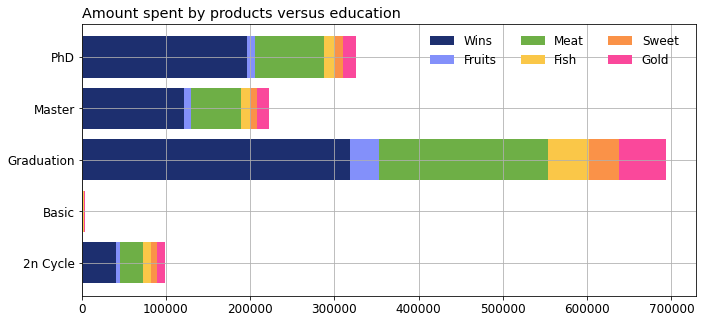

In [7]:
###plot Amount spent by product & education
df_grouped_edu = df.groupby('Education').sum()[['Wines','Fruits','Meat','Fish', 'Sweet','Gold']]
fields = ['Wines','Fruits','Meat','Fish', 'Sweet','Gold']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#fa9248','#fa489b']
labels = ['Wins', 'Fruits', 'Meat', 'Fish','Sweet','Gold']
plt.rc('font', size=12)
fig, ax1 = plt.subplots(1, figsize=(11, 5))
left = len(df_grouped_edu) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped_edu.index, df_grouped_edu[name], left = left, color=colors[idx])
    left = left + df_grouped_edu[name]
plt.title('Amount spent by products versus education', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=3, frameon=False)
plt.grid()
plt.savefig('Products_education', bbox_inches='tight', dpi=300)

In [8]:
check=df_grouped_edu.copy()
check['sum']=check['Wines']+check['Fruits']+check['Meat']+check['Fish']+check['Sweet']+check['Gold']
check
sum_revenue=check['sum'].sum()
check['Wines']=check['Wines']/check['sum']*100
check['Fruits']=check['Fruits']/check['sum']*100
check['Meat']=check['Meat']/check['sum']*100
check['Fish']=check['Fish']/check['sum']*100
check['Sweet']=check['Sweet']/check['sum']*100
check['Gold']=check['Gold']/check['sum']*100
check['sum']=check['sum']/sum_revenue*100
check

#values in column wines to column gold, for example cell [0,0], is the percentage of amount spent on wines in total amount spent
#on all 6 products of group 2n cycle

# values in column sum, for example cell (0,6) is the percentage of total amount of group 2n Cycle in total revernue

,Wines,Fruits,Meat,Fish,Sweet,Gold,sum
Education,,,,,,,
2n Cycle,40.580486,5.932152,27.292748,9.706423,7.016144,9.472047,7.358028
Basic,8.852162,13.583880,13.991397,20.851257,14.806430,27.914874,0.328333
Graduation,45.850401,4.964096,29.016780,6.983693,5.032416,8.152614,51.573094
Master,54.607867,3.505493,26.718487,5.164783,3.412486,6.590884,16.544152
PhD,60.174680,2.976876,25.081949,3.971626,3.006676,4.788193,24.196393


In [9]:
edu_no_cus=df.groupby('Education').count()['Gold']
cus_total=edu_no_cus.sum()
edu_no_cus_percent=edu_no_cus.copy()
edu_no_cus_percent[0]=edu_no_cus[0]/cus_total*100
edu_no_cus_percent[1]=edu_no_cus[1]/cus_total*100
edu_no_cus_percent[2]=edu_no_cus[2]/cus_total*100
edu_no_cus_percent[3]=edu_no_cus[3]/cus_total*100
edu_no_cus_percent[4]=edu_no_cus[4]/cus_total*100
edu_no_cus_percent

Education
2n Cycle       9
Basic          2
Graduation    50
Master        16
PhD           21
Name: Gold, dtype: int64

In [10]:
mean_spent_pro_edu=df.groupby('Education')['Wines','Fruits','Meat','Fish','Sweet','Gold'].mean()
mean_spent_pro_edu

<ipython-input-10-4779e2af50ad>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_spent_pro_edu=df.groupby('Education')['Wines','Fruits','Meat','Fish','Sweet','Gold'].mean()


,Wines,Fruits,Meat,Fish,Sweet,Gold
Education,,,,,,
2n Cycle,200.845000,29.360000,135.080000,48.040000,34.725000,46.880000
Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
Graduation,285.045699,30.861111,180.393369,43.416667,31.285842,50.683692
Master,332.980822,21.375342,162.920548,31.493151,20.808219,40.189041
PhD,407.222453,20.145530,169.738046,26.877339,20.347193,32.403326


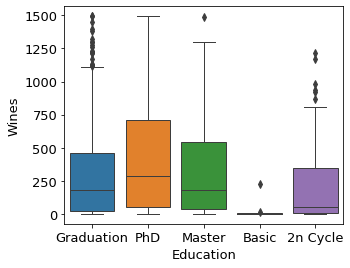

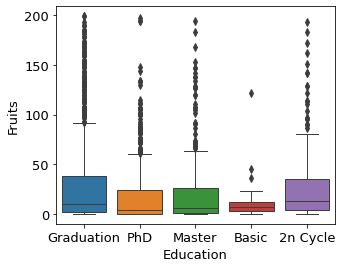

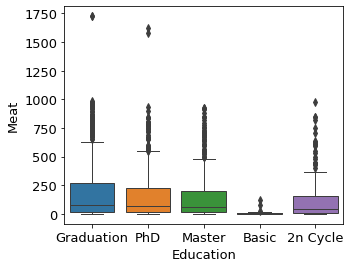

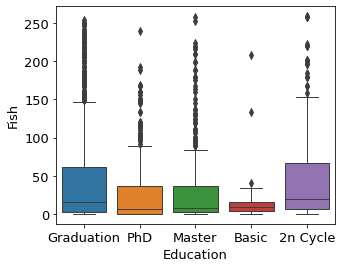

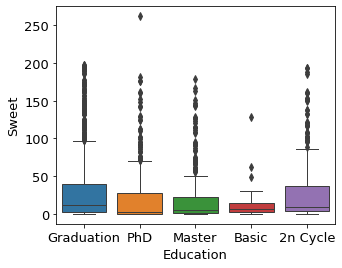

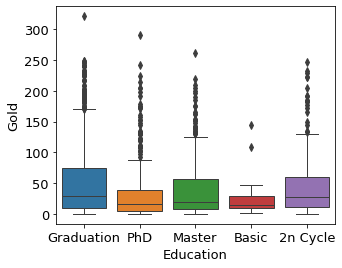

In [11]:
#due to the scale of Y axis of plots are different, so I plot into seperate figures instead of sub figures in 1 big figure
plt.rc('font', size=13)
fig = plt.figure(figsize=(5, 4))
ax2 = sns.boxplot(x="Education", y="Wines",data=df, linewidth=1)
plt.savefig('Education_vs_Wines', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(5, 4))
ax2 = sns.boxplot(x="Education", y="Fruits",data=df, linewidth=1)
plt.savefig('Education_vs_Fruits', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(5, 4))
ax2 = sns.boxplot(x="Education", y="Meat",data=df, linewidth=1)
plt.savefig('Education_vs_Meat', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(5, 4))
ax2 = sns.boxplot(x="Education", y="Fish",data=df, linewidth=1)
plt.savefig('Education_vs_Fish', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(5, 4))
ax2 = sns.boxplot(x="Education", y="Sweet",data=df, linewidth=1)
plt.savefig('Education_vs_Sweet', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(5, 4))
ax2 = sns.boxplot(x="Education", y="Gold",data=df, linewidth=1)
plt.savefig('Education_vs_Gold', bbox_inches='tight', dpi=300)

#### 3.2 Number of kids versus expenditure

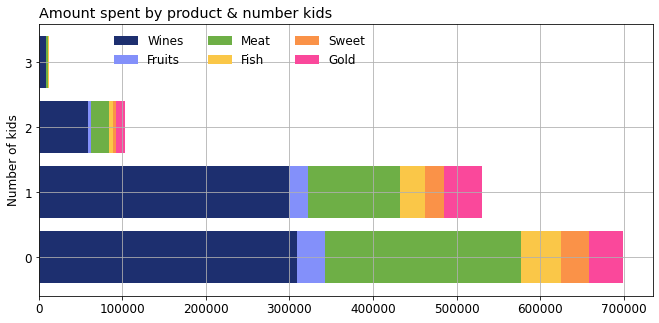

In [12]:
##Amount spent by product & number of kids
df_grouped_kid = df.groupby('Kids').sum()[['Wines','Fruits','Meat','Fish', 'Sweet','Gold']]
fields = ['Wines','Fruits','Meat','Fish', 'Sweet','Gold']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#fa9248','#fa489b']
labels = ['Wines','Fruits','Meat','Fish', 'Sweet','Gold']
plt.rc('font', size=12)
fig, ax4 = plt.subplots(1, figsize=(11, 5))
left = len(df_grouped_kid) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped_kid.index, df_grouped_kid[name], left = left, color=colors[idx])
    left = left + df_grouped_kid[name]
plt.title('Amount spent by product & number kids', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=3, frameon=False)
plt.grid()
plt.ylabel('Number of kids')
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.savefig('Amount spent by product kids', bbox_inches='tight', dpi=300)

In [13]:
check3=df_grouped_kid.copy()
check3['sum']=check3['Wines']+check3['Fruits']+check3['Meat']+check3['Fish']+check3['Sweet']+check3['Gold']
check3
check3['Wines']=check3['Wines']/check3['sum']*100
check3['Fruits']=check3['Fruits']/check3['sum']*100
check3['Meat']=check3['Meat']/check3['sum']*100
check3['Fish']=check3['Fish']/check3['sum']*100
check3['Sweet']=check3['Sweet']/check3['sum']*100
check3['Gold']=check3['Gold']/check3['sum']*100
check3['sum']=check3['sum']/sum_revenue*100
check3
#values in column wines to column gold, for example cell [0,0], is the percentage of amount spent on wines in total amount spent
#on all 6 products of group 0 children

# values in column sum, for example cell (0,6) is the percentage of total amount of group 0 children in total revernue

,Wines,Fruits,Meat,Fish,Sweet,Gold,sum
Kids,,,,,,,
0,44.159560,4.729697,33.554977,6.932315,4.811598,5.811853,52.005718
1,56.565518,4.101350,20.899970,5.647065,4.247699,8.538398,39.414872
2,57.610920,3.184856,20.950488,4.573177,3.367043,10.313517,7.629793
3,63.146771,2.340509,23.334638,2.097847,1.988258,7.091977,0.949617


In [14]:
kid_no_cus=df.groupby('Kids').count()['Gold']
kid_no_cus_percent=kid_no_cus.copy()
kid_no_cus_percent[0]=kid_no_cus[0]/cus_total*100
kid_no_cus_percent[1]=kid_no_cus[1]/cus_total*100
kid_no_cus_percent[2]=kid_no_cus[2]/cus_total*100
kid_no_cus_percent[3]=kid_no_cus[3]/cus_total*100
kid_no_cus_percent

Kids
0    28
1    50
2    18
3     2
Name: Gold, dtype: int64

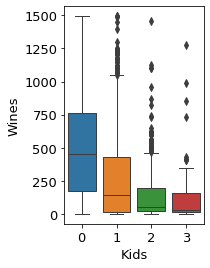

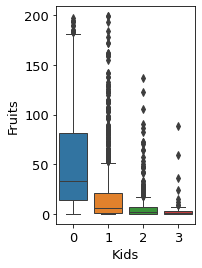

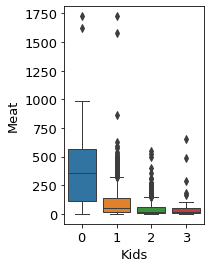

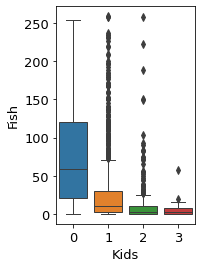

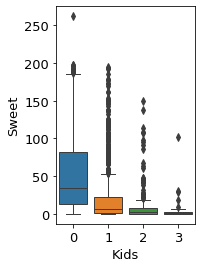

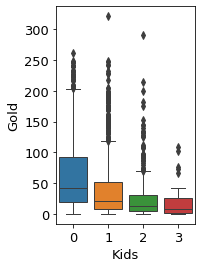

In [15]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Kids", y="Wines", data=df, linewidth=1)
plt.savefig('Kids_vs_Wines', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Kids", y="Fruits", data=df, linewidth=1)
plt.savefig('Kids_vs_Fruits', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Kids", y="Meat", data=df, linewidth=1)
plt.savefig('Kids_vs_Meat', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Kids", y="Fish", data=df, linewidth=1)
plt.savefig('Kids_vs_Fish', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Kids", y="Sweet", data=df, linewidth=1)
plt.savefig('Kids_vs_Sweet', bbox_inches='tight', dpi=300)

plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Kids", y="Gold", data=df, linewidth=1)
plt.savefig('Kids_vs_Gold', bbox_inches='tight', dpi=300)

#### 3.3 Marital status versus expenditure

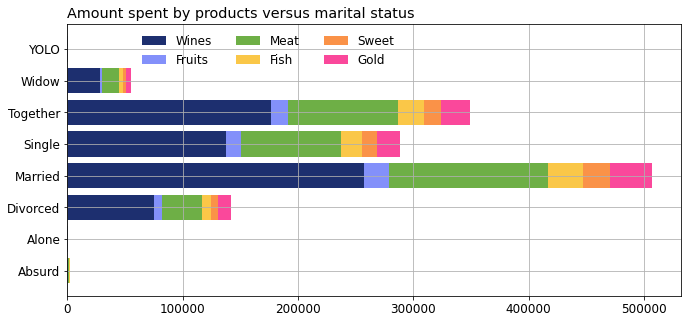

In [16]:
##Amount spent by product & marital status
df_grouped_mar = df.groupby('Marital_Status').sum()[['Wines','Fruits','Meat','Fish', 'Sweet','Gold']]
fields = ['Wines','Fruits','Meat','Fish', 'Sweet','Gold']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#fa9248','#fa489b']
labels = ['Wines','Fruits','Meat','Fish', 'Sweet','Gold']
plt.rc('font', size=12)
fig, ax3 = plt.subplots(1, figsize=(11, 5))
left = len(df_grouped_mar) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped_mar.index, df_grouped_mar[name], left = left, color=colors[idx])
    left = left + df_grouped_mar[name]
plt.title('Amount spent by products versus marital status', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=3, frameon=False)
plt.grid()
plt.savefig('Products_marrital', bbox_inches='tight', dpi=300)

In [17]:
mar_no_cus=df.groupby('Marital_Status').count()['Gold']
mar_no_cus

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     857
Single      471
Together    573
Widow        76
YOLO          2
Name: Gold, dtype: int64

In [18]:
df_grouped_mar

,Wines,Fruits,Meat,Fish,Sweet,Gold
Marital_Status,,,,,,
Absurd,711,169,625,411,61,408
Alone,554,12,79,23,21,81
Divorced,75364,6363,34848,8130,6222,10739
Married,256976,21981,137888,30395,22926,36719
Single,137217,12840,87064,18262,12751,20397
Together,176715,14612,95374,22383,15031,24754
Widow,27902,2422,14085,3793,2878,4245
YOLO,644,6,100,8,6,84


In [19]:
check2=df_grouped_mar.copy()
check2['sum']=check2['Wines']+check2['Fruits']+check2['Meat']+check2['Fish']+check2['Sweet']+check2['Gold']
check2
check2['Wines']=check2['Wines']/check2['sum']*100
check2['Fruits']=check2['Fruits']/check2['sum']*100
check2['Meat']=check2['Meat']/check2['sum']*100
check2['Fish']=check2['Fish']/check2['sum']*100
check2['Sweet']=check2['Sweet']/check2['sum']*100
check2['Gold']=check2['Gold']/check2['sum']*100
check2['sum']=check2['sum']/sum_revenue*100
check2
#values in column wines to column gold, for example cell [0,0], is the percentage of amount spent on wines in total amount spent
#on all 6 products of group Absurd

# values in column sum, for example cell (0,6) is the percentage of total amount of group Absurd in total revernue

,Wines,Fruits,Meat,Fish,Sweet,Gold,sum
Marital_Status,,,,,,,
Absurd,29.811321,7.085954,26.205451,17.232704,2.557652,17.106918,0.177287
Alone,71.948052,1.558442,10.259740,2.987013,2.727273,10.519481,0.057237
Divorced,53.198368,4.491551,24.598704,5.738851,4.392021,7.580506,10.530604
Married,50.697101,4.336487,27.203014,5.996429,4.522919,7.244049,37.678801
Single,47.557108,4.450128,30.174921,6.329303,4.419283,7.069258,21.447670
Together,50.653684,4.188392,27.338055,6.415875,4.308494,7.095500,25.932836
Widow,50.432897,4.377768,25.458653,6.855852,5.201988,7.672842,4.112530
YOLO,75.943396,0.707547,11.792453,0.943396,0.707547,9.905660,0.063035


In [20]:
mean_spent_pro_mar=df.groupby('Marital_Status2')['Wines','Fruits','Meat','Fish','Sweet','Gold'].mean()
mean_spent_pro_mar

<ipython-input-20-6ed8c1a39834>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_spent_pro_mar=df.groupby('Marital_Status2')['Wines','Fruits','Meat','Fish','Sweet','Gold'].mean()


,Wines,Fruits,Meat,Fish,Sweet,Gold
Marital_Status2,,,,,,
Relationship,303.280420,25.589510,163.120280,36.907692,26.543357,42.988112
Single,308.386768,27.750636,174.047074,38.965649,27.912214,45.743003


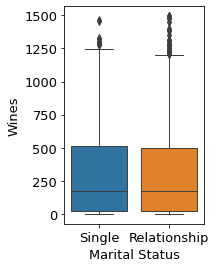

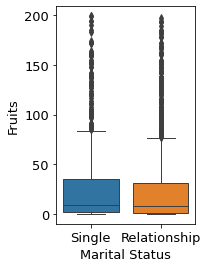

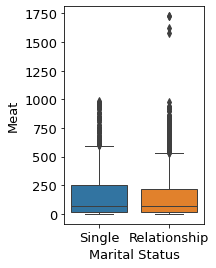

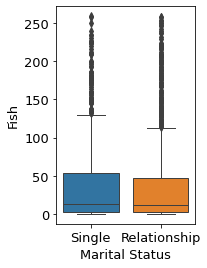

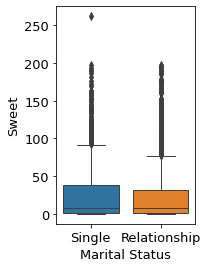

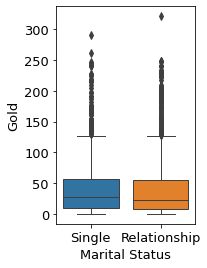

In [21]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Marital_Status2", y="Wines",data=df, linewidth=1)
plt.xlabel('Marital Status')
plt.savefig('Marital_vs_Wines', bbox_inches='tight', dpi=300)


plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Marital_Status2", y="Fruits",data=df, linewidth=1)
plt.xlabel('Marital Status')
plt.savefig('Marital_vs_Fruits', bbox_inches='tight', dpi=300)


plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Marital_Status2", y="Meat",data=df, linewidth=1)
plt.xlabel('Marital Status')
plt.savefig('Marital_vs_Meat', bbox_inches='tight', dpi=300)


plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Marital_Status2", y="Fish",data=df, linewidth=1)
plt.xlabel('Marital Status')
plt.savefig('Marital_vs_Fish', bbox_inches='tight', dpi=300)


plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Marital_Status2", y="Sweet",data=df, linewidth=1)
plt.xlabel('Marital Status')
plt.savefig('Marital_vs_Sweet', bbox_inches='tight', dpi=300)


plt.rc('font', size=13)
fig = plt.figure(figsize=(2.5, 4))
sns.boxplot(x="Marital_Status2", y="Gold",data=df, linewidth=1)
plt.xlabel('Marital Status')
plt.savefig('Marital_vs_Gold', bbox_inches='tight', dpi=300)


#### 3.4 Customer personality and Marketing campaigns

In [22]:
#response of different education groups on marketing campaign

In [23]:
df_cam_edu=df.groupby('Education')['Accepted_camp'].mean()
df_cam_edu

Education
2n Cycle      0.360000
Basic         0.148148
Graduation    0.439964
Master        0.432877
PhD           0.550936
Name: Accepted_camp, dtype: float64

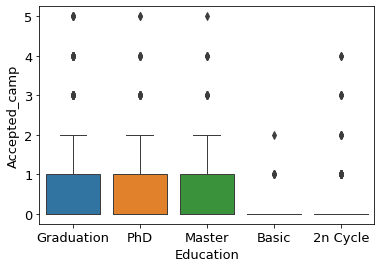

In [24]:
fig = plt.figure(figsize=(6, 4))
ax2 = sns.boxplot(x="Education",y="Accepted_camp",data=df, linewidth=1)
plt.savefig('Edu_camp_boxplot', bbox_inches='tight', dpi=300)

In [25]:
#response of different marital status groups on marketing campaign

In [26]:
df_cam_mar=df.groupby('Marital_Status')['Accepted_camp'].mean()
df_cam_mar

Marital_Status
Absurd      1.500000
Alone       0.666667
Divorced    0.500000
Married     0.417736
Single      0.513800
Together    0.396161
Widow       0.592105
YOLO        0.500000
Name: Accepted_camp, dtype: float64

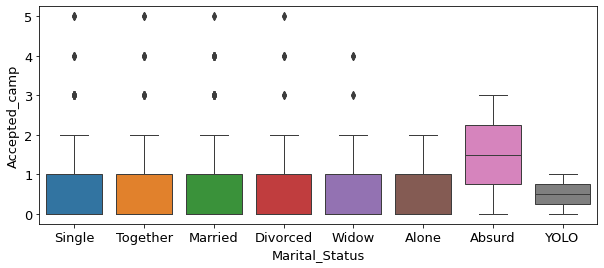

In [27]:
fig = plt.figure(figsize=(10, 4))
ax2 = sns.boxplot(x="Marital_Status",y="Accepted_camp",data=df, linewidth=1)
plt.savefig('mar_camp_box', bbox_inches='tight', dpi=300)

In [28]:
#response of different number of kids groups on marketing campaign

In [29]:
df_cam_mar=df.groupby('Kids')['Accepted_camp'].mean()
df_cam_mar

Kids
0    0.864139
1    0.301701
2    0.245192
3    0.160000
Name: Accepted_camp, dtype: float64

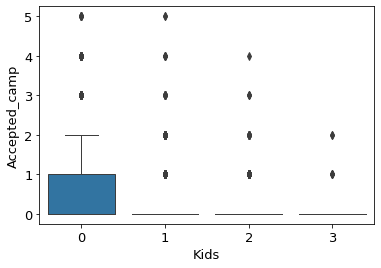

In [30]:
fig = plt.figure(figsize=(6, 4))
ax2 = sns.boxplot(x="Kids",y="Accepted_camp",data=df, linewidth=1)
plt.savefig('Kids_cam_box', bbox_inches='tight', dpi=300)

#### 3.5 Correlation between variables

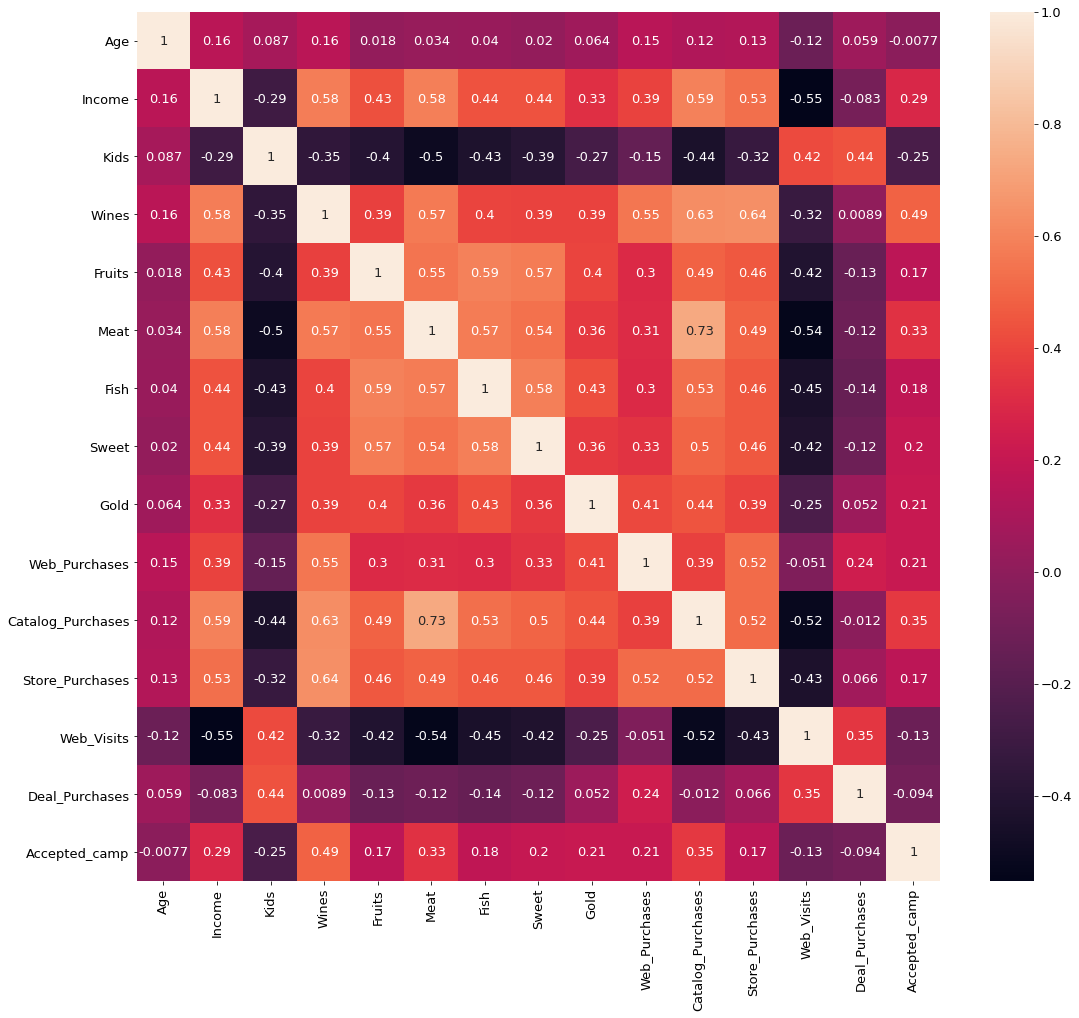

In [31]:
fig = plt.figure(figsize=(18,16))
corr=df.corr()
sns.heatmap(corr, annot=True)
plt.show
plt.savefig('Heat_map', bbox_inches='tight', dpi=300)

### 4. Unsupervised Learning

In [32]:
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale

#### 4.1. Preparing data

##### 4.1.1. Remove outliers

<Figure size 864x288 with 0 Axes>

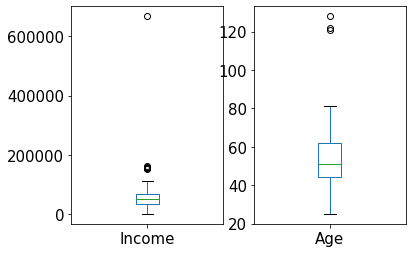

In [33]:
df2 = df.copy()
df2_group_plot = df2[['Income','Age']]
plt.rc('font', size=15)

fig = plt.figure(figsize=(12, 4))

df2_group_plot.plot(kind='box', subplots=True, layout=(1,2))
plt.savefig('Remove_outliers', bbox_inches='tight', dpi=300)

In [34]:
# I will IDs with income >=600000 and Age >=100

In [35]:
df2 = df2[df2['Age'] < 100]
df2 =df2[df2['Income']<200000]

<Figure size 864x288 with 0 Axes>

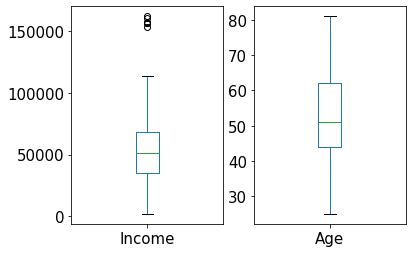

In [36]:
df2_group_plot = df2[['Income','Age']]
plt.rc('font', size=15)

fig = plt.figure(figsize=(12, 4))

df2_group_plot.plot(kind='box', subplots=True, layout=(1,2))
plt.savefig('Remove_outliers2', bbox_inches='tight', dpi=300)

##### 4.1.2. Making age groups for customers

In [37]:
#Grouping ages
df2['Age'] = np.where(df2['Age'] <= 30, "(0,30]", 
                     np.where(df2['Age'] <= 40, "(30,40]", 
                    np.where(df2['Age'] <= 50, "(40, 50]", 
                    np.where(df2['Age'] <=60, "(50, 60]",
                    np.where(df2['Age'] <=70, "(60, 70]",(70, ))))))



##### 4.1.3. Scaling data

In [38]:
#Scaling
df2a=df2.copy()
scale_list = ['Income','Kids','Wines','Fruits','Meat','Fish','Sweet','Gold','Web_Purchases','Catalog_Purchases',
                            'Store_Purchases','Web_Visits','Deal_Purchases','Accepted_camp']
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
df2a[scale_list] = autoscaler.fit_transform(df2a[scale_list])

# df2a.head()

##### 4.1.4. LabelEncoder

In [39]:
#LabelEncoder
df2a=df2a.drop('Marital_Status',axis=1)
from sklearn.preprocessing import LabelEncoder
cols = ['Education', 'Marital_Status2','Age']

for col in cols:
    df2a[col] = LabelEncoder().fit_transform(df2a[col])
#df2a.head()

#### 4.2. Clustering

##### 4.2.1. Optimise value of k

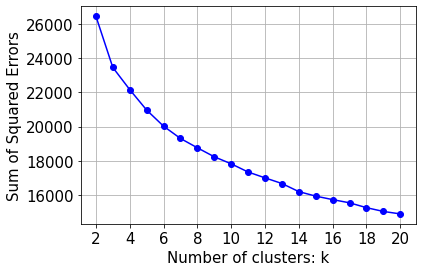

In [40]:
#K-Means Clustering
from sklearn.cluster import KMeans
k_range = range(2,21)
sse = []
    
for k in k_range:
    km = KMeans(n_clusters=k, max_iter=400, tol=0.00005).fit(df2a)
    km.predict(df2a)
    sse.append(km.inertia_)

plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters: k')
plt.ylabel('Sum of Squared Errors')
plt.grid()
plt.xticks(np.arange(2,21, step=2))
plt.savefig('Elbow_plot', bbox_inches='tight', dpi=300)

In [41]:
# As can be seen from figure above, the value of k corresponding to elbow point is not clear. 
# It can be either 4, 5, or 6.

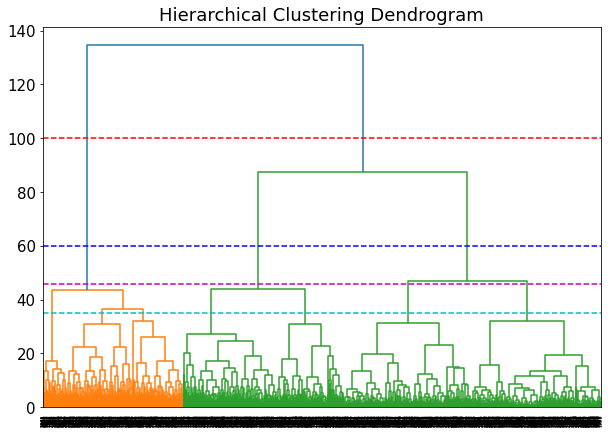

In [42]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Hierarchical Clustering Dendrogram")  
dend = shc.dendrogram(shc.linkage(df2a, method='ward'))

# # now draw horizontal lines to see possible number of clusters
plt.axhline(y=100, color='r', linestyle='--')
plt.axhline(y=60, color='b', linestyle='--')
plt.axhline(y=46, color='m', linestyle='--')
plt.axhline(y=35, color='c', linestyle='--')
plt.savefig('Hierarchical_Dendrogram', bbox_inches='tight', dpi=300)

In [43]:
# from dendrograms and elbow plot, I decide to choose k=4

In [44]:
#optimise options for KMeans with k = 4

##### 4.2.2. Optimise options for KMeans clustering

In [45]:
sse = []
options = []
# three options of algorithms
algorithms = ['auto', 'full', 'elkan']
# three values of n_inits
n_inits = [10, 15, 20]
for alg in algorithms:
    for n_init in n_inits:
        options.append([alg, n_init])
        
        km = KMeans(n_clusters=4, n_init=n_init, max_iter=400, tol=0.00005, algorithm=alg).fit(df2a)
        km.fit_predict(df2a)
        
        sse.append(km.inertia_)
sse

[22153.214033407847,
 22153.230007763388,
 22153.230007763388,
 22153.230007763388,
 22153.230007763388,
 22153.230007763388,
 22153.230007763388,
 22153.230007763388,
 22153.38983061831]

In [46]:
min_error = np.amin(sse)
print(min_error)
best_case = np.where(sse == min_error)
best_case = best_case[0]
print(best_case)
final_opt = options[best_case[0]]
final_opt

22153.214033407847
[0]


['auto', 10]

##### 4.2.3. Clustering results

In [47]:
km = KMeans(n_clusters=4, n_init=final_opt[1], max_iter=400, tol=0.00005, algorithm=final_opt[0]).fit(df2a)
km_pred = km.predict(df2a)
km_pred

array([0, 3, 1, ..., 1, 1, 3])

In [48]:
df2a['Cluster'] = km_pred

In [49]:
#df2a.head()

In [50]:
df2a['Cluster'] = df2a['Cluster'].astype('str')
df2a['Cluster'] = np.where(df2a['Cluster'] == '0', "Cluster 1", 
                          np.where(df2a['Cluster'] == '1', "Cluster 2", 
                          np.where(df2a['Cluster'] == '2', "Cluster 3","Cluster 4")))

In [51]:
df3=df2.copy()
df3['total_spend']=df3['Wines']+df3['Fruits']+df3['Meat']+df3['Fish']+df3['Sweet']+df3['Gold']

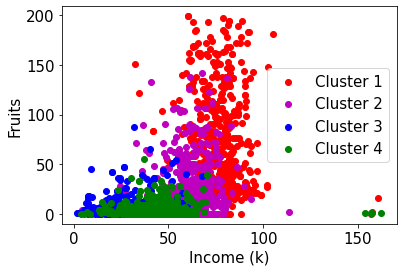

In [52]:
df3_clus1 = df3[df2a['Cluster'] == "Cluster 1"]
df3_clus2 = df3[df2a['Cluster'] == "Cluster 2"]
df3_clus3 = df3[df2a['Cluster'] == "Cluster 3"]
df3_clus4 = df3[df2a['Cluster'] == "Cluster 4"]

plt.Figure(figsize=(20, 20))
plt.scatter(df3_clus1['Income']/1000, df3_clus1['Fruits'], c='r')
plt.scatter(df3_clus2['Income']/1000, df3_clus2['Fruits'], c='m')
plt.scatter(df3_clus3['Income']/1000, df3_clus3['Fruits'], c='b')
plt.scatter(df3_clus4['Income']/1000, df3_clus4['Fruits'], c='g')

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
plt.legend(labels)


plt.xlabel('Income (k)')
plt.ylabel('Fruits')
plt.savefig('Fruits_clusters', bbox_inches='tight', dpi=300)

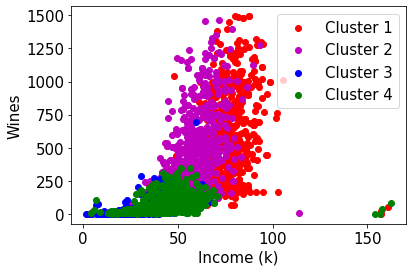

In [53]:
plt.Figure(figsize=(20, 20))
plt.scatter(df3_clus1['Income']/1000, df3_clus1['Wines'], c='r')
plt.scatter(df3_clus2['Income']/1000, df3_clus2['Wines'], c='m')
plt.scatter(df3_clus3['Income']/1000, df3_clus3['Wines'], c='b')
plt.scatter(df3_clus4['Income']/1000, df3_clus4['Wines'], c='g')



labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plt.legend(labels)


plt.xlabel('Income (k)')
plt.ylabel('Wines')
plt.savefig('Wines_clusters', bbox_inches='tight', dpi=300)

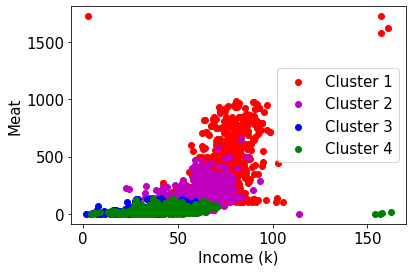

In [54]:
plt.Figure(figsize=(20, 20))
plt.scatter(df3_clus1['Income']/1000, df3_clus1['Meat'], c='r')
plt.scatter(df3_clus2['Income']/1000, df3_clus2['Meat'], c='m')
plt.scatter(df3_clus3['Income']/1000, df3_clus3['Meat'], c='b')
plt.scatter(df3_clus4['Income']/1000, df3_clus4['Meat'], c='g')



labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plt.legend(labels)


plt.xlabel('Income (k)')
plt.ylabel('Meat')
plt.savefig('Meat_clusters', bbox_inches='tight', dpi=300)

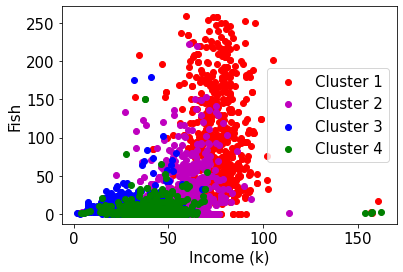

In [55]:
plt.Figure(figsize=(20, 20))
plt.scatter(df3_clus1['Income']/1000, df3_clus1['Fish'], c='r')
plt.scatter(df3_clus2['Income']/1000, df3_clus2['Fish'], c='m')
plt.scatter(df3_clus3['Income']/1000, df3_clus3['Fish'], c='b')
plt.scatter(df3_clus4['Income']/1000, df3_clus4['Fish'], c='g')



labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plt.legend(labels)


plt.xlabel('Income (k)')
plt.ylabel('Fish')
plt.savefig('Fish_clusters', bbox_inches='tight', dpi=300)

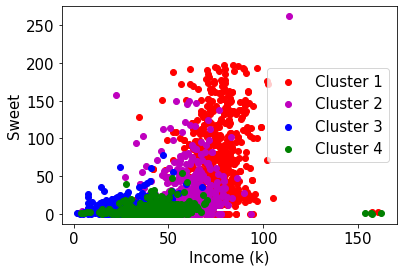

In [56]:
plt.Figure(figsize=(20, 20))
plt.scatter(df3_clus1['Income']/1000, df3_clus1['Sweet'], c='r')
plt.scatter(df3_clus2['Income']/1000, df3_clus2['Sweet'], c='m')
plt.scatter(df3_clus3['Income']/1000, df3_clus3['Sweet'], c='b')
plt.scatter(df3_clus4['Income']/1000, df3_clus4['Sweet'], c='g')


labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plt.legend(labels)


plt.xlabel('Income (k)')
plt.ylabel('Sweet')
plt.savefig('Sweet_clusters', bbox_inches='tight', dpi=300)

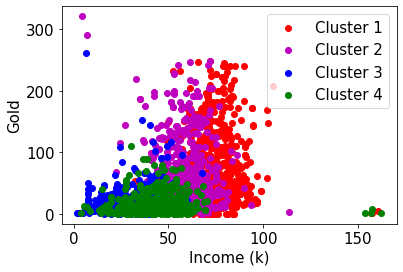

In [57]:
plt.Figure(figsize=(20, 20))
plt.scatter(df3_clus1['Income']/1000, df3_clus1['Gold'], c='r')
plt.scatter(df3_clus2['Income']/1000, df3_clus2['Gold'], c='m')
plt.scatter(df3_clus3['Income']/1000, df3_clus3['Gold'], c='b')
plt.scatter(df3_clus4['Income']/1000, df3_clus4['Gold'], c='g')


labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plt.legend(labels)


plt.xlabel('Income (k)')
plt.ylabel('Gold')
plt.savefig('Gold_clusters', bbox_inches='tight', dpi=300)

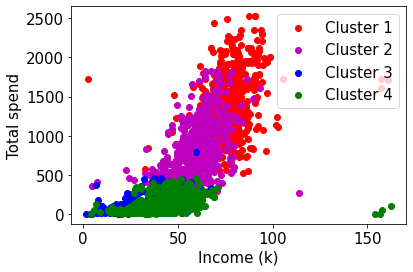

In [58]:
plt.Figure(figsize=(20, 20))
plt.scatter(df3_clus1['Income']/1000, df3_clus1['total_spend'], c='r')
plt.scatter(df3_clus2['Income']/1000, df3_clus2['total_spend'], c='m')
plt.scatter(df3_clus3['Income']/1000, df3_clus3['total_spend'], c='b')
plt.scatter(df3_clus4['Income']/1000, df3_clus4['total_spend'], c='g')



labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plt.legend(labels)

# plt.grid()
plt.xlabel('Income (k)')
plt.ylabel('Total spend')
plt.savefig('Total_spend_clusters', bbox_inches='tight', dpi=300)

### 5. Supervised Learning

In [59]:
df2b=df2a.drop('Cluster',axis=1)

In [60]:
df2b['Education'].unique()

array([2, 4, 3, 1, 0])

#### 5.2. Determination of best output and best model

##### Trial 1: Education & others

In [61]:
df2b = df2b.reset_index('ID')

In [62]:
X=df2b.drop(['ID','Education','Marital_Status2','Age','Income','Kids'],axis=1)
Y_edu=df2b['Education']

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
## Using cross validation score model: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score

In [64]:
#Logistic
Logis_score = cross_val_score(LogisticRegression(multi_class='auto', solver='liblinear', max_iter=200), X, Y_edu,cv=10)
Logis_score.mean()

0.530265786148139

In [65]:
#SVC
SVC_score = cross_val_score(SVC(gamma='scale'), X, Y_edu,cv=10)
SVC_score.mean()

0.5370612694142105

In [66]:
#Decision Tree
Decis_tree = tree.DecisionTreeClassifier()
D_tree_score = cross_val_score(Decis_tree, X, Y_edu, cv=10)
D_tree_score.mean()

0.5009009009009009

In [67]:
#Naïve Bayes
Naive_Bayes = GaussianNB(var_smoothing=1e-10)

Naive_Bayes_score = cross_val_score(Naive_Bayes, X, Y_edu, cv=10)
Naive_Bayes_score.mean()

0.32006237006237004

In [68]:
#All 4 classifications give very low scores. It means that there is no clear classification for Education vesus others

##### Trial 2: Marital_Status vs others

In [69]:
Y_mar=df2b['Marital_Status2']

In [70]:
#Logistic
Logis_score = cross_val_score(LogisticRegression(multi_class='auto', solver='liblinear', max_iter=200), X, Y_mar,cv=10)
Logis_score.mean()

0.6414985120867474

In [71]:
#SVC
SVC_score = cross_val_score(SVC(gamma='scale'), X, Y_mar,cv=10)
SVC_score.mean()

0.644223635400106

In [72]:
#Decision Tree
Decis_tree = tree.DecisionTreeClassifier()
D_tree_score = cross_val_score(Decis_tree, X, Y_mar, cv=10)
D_tree_score.mean()

0.6039766010354246

In [73]:
#Naïve Bayes
Naive_Bayes = GaussianNB(var_smoothing=1e-10)

Naive_Bayes_score = cross_val_score(Naive_Bayes, X, Y_mar, cv=10)
Naive_Bayes_score.mean()

0.6089335942277119

In [74]:
#All 4 classifications give very low scores. It means that there is no clear classification for Marrital status vesus others

##### Trial 3: Age vs others

In [75]:
Y_age=df2b['Age']

In [76]:
#Logistic
Logis_score = cross_val_score(LogisticRegression(multi_class='auto', solver='liblinear', max_iter=200), X, Y_age,cv=10)
Logis_score.mean()

0.32458725694019813

In [77]:
#SVC
SVC_score = cross_val_score(SVC(gamma='scale'), X, Y_age,cv=10)
SVC_score.mean()

0.34582772818066937

In [78]:
#Decision Tree
Decis_tree = tree.DecisionTreeClassifier()
D_tree_score = cross_val_score(Decis_tree, X, Y_age, cv=10)
D_tree_score.mean()

0.380632668867963

In [79]:
#Naïve Bayes
Naive_Bayes = GaussianNB(var_smoothing=1e-10)

Naive_Bayes_score = cross_val_score(Naive_Bayes, X, Y_age, cv=10)
Naive_Bayes_score.mean()

0.2879662467897762

In [80]:
#All 4 classifications give very low scores. It means that there is no clear classification for Age vesus others

##### Trial 4: Income vs others = Best option

In [81]:
df2 = df2.reset_index('ID')

In [82]:
df2b['Income'] = df2['Income']
# df2b.head()

In [83]:
# Create column: 'Income2' containing: high_income=0, low_income=1
df2b['Income2'] = np.where((df2b["Income"] >= df2b["Income"].mean()), 0, 1)
df2b = df2b.drop('Income', axis=1)
df2b.head()

,ID,Education,Marital_Status2,Age,Kids,Wines,Fruits,Meat,Fish,Sweet,Gold,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits,Deal_Purchases,Accepted_camp,Income2
0,5524,2,1,4,-1.264598,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,1.426865,2.503607,-0.555814,0.692181,0.351030,0.617244,0
1,2174,2,1,4,1.404572,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-1.126420,-0.571340,-1.171160,-0.132545,-0.168701,-0.502808,1
2,4141,2,0,3,-1.264598,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,1.426865,-0.229679,1.290224,-0.544908,-0.688432,-0.502808,0
3,6182,2,0,1,0.069987,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.761665,-0.913000,-0.555814,0.279818,-0.168701,-0.502808,1
4,5324,4,0,1,0.069987,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,0.332600,0.111982,0.059532,-0.132545,1.390492,-0.502808,0


In [84]:
X = df2b.drop(['ID','Education','Marital_Status2','Age','Income2','Kids'],axis=1)
y_Income = df2b['Income2']

In [85]:
#Logistic
Logis_score = cross_val_score(LogisticRegression(multi_class='auto', solver='liblinear', max_iter=200), X, y_Income,cv=10)
Logis_score.mean()

0.9145326321796909

In [86]:
#SVC
SVC_score = cross_val_score(SVC(gamma='scale'), X, y_Income,cv=10)
SVC_score.mean()

0.9109147609147609

In [87]:
#Decision Tree
Decis_tree = tree.DecisionTreeClassifier()
D_tree_score = cross_val_score(Decis_tree, X, y_Income, cv=10)
D_tree_score.mean()

0.899627002568179

In [88]:
#Naïve Bayes
Naive_Bayes = GaussianNB(var_smoothing=1e-10)
Naive_Bayes_score = cross_val_score(Naive_Bayes, X, y_Income, cv=10)
Naive_Bayes_score.mean()

0.888769312298724

In [89]:
## All 4 classifications give quite high scores in which losgistic regression give highest core of 0.914.
##therefore, we can conclude that dividing customers into low and high income groups give good classification.
# Now let prin model score and confusion matrix

#### 5.3. Classification results

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Income, test_size = 0.30)
lm = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=400)
lm.fit(X_train, y_train)
lm.predict_proba(X_test)
predicted = lm.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       329
           1       0.91      0.91      0.91       335

    accuracy                           0.91       664
   macro avg       0.91      0.91      0.91       664
weighted avg       0.91      0.91      0.91       664

[[297  32]
 [ 29 306]]


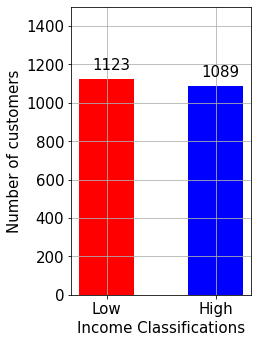

In [91]:
df2c = df2.drop('Income',axis=1)
df2c['Income'] = df2b['Income2']

# High Income = 0, Low income = 1
df2c['Income'] = np.where(df2c['Income'] == 0, "High", "Low")

# Plot umber of low-income and high-income customers
df2_Income = pd.DataFrame(df2c['Income'].value_counts()).reset_index()
df2_Income.columns = ['Income', 'Count']
# df2_Income.head()

c = ['r', 'b']

plt.rc('font', size=15)

fig = plt.figure(figsize=(2.5, 4))
ax = fig.add_axes([0,0,1,1])

ax.bar(df2_Income['Income'],df2_Income['Count'], width=0.5, color=c)

for i in range(np.size(df2_Income,axis=0)):    
    plt.text(x=i-0.13 , y=df2_Income.iloc[i,1]+50 , s=f"{df2_Income.iloc[i,1]}" , fontdict=dict(fontsize=15))

plt.ylim((0,1500))
plt.grid(b=bool)

ax.set_xlabel('Income Classifications')
ax.set_ylabel('Number of customers')
plt.savefig('Customer_NO_Classification', bbox_inches='tight', dpi=300)

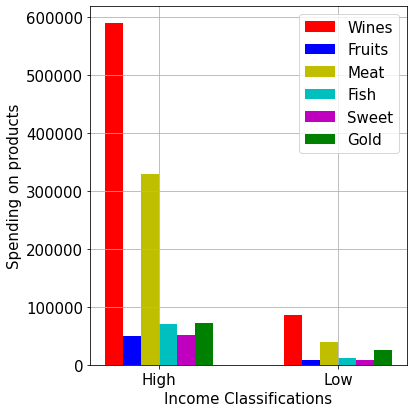

In [92]:
# plot classification groups versus spending on products: Wine	Fruit	Meat	Fish	Sweet	Gold
df2_Income_sum = df2c.groupby("Income").sum()
df2_Income_sum = df2_Income_sum.reset_index('Income')

plt.rc('font', size=15)

plot_list = ['Wines','Fruits','Meat','Fish','Sweet','Gold']
x = np.arange(2)
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 6))
plt1 = ax.bar(x - 5*width/2, df2_Income_sum['Wines'], width, label='Wines', color='r')
plt2 = ax.bar(x - 3*width/2, df2_Income_sum['Fruits'], width, label='Fruits', color='b')
plt3 = ax.bar(x - 1*width/2, df2_Income_sum['Meat'], width, label='Meat', color='y')
plt4 = ax.bar(x + 1*width/2, df2_Income_sum['Fish'], width, label='Fish', color='c')
plt5 = ax.bar(x + 3*width/2, df2_Income_sum['Sweet'], width, label='Sweet', color='m')
plt6 = ax.bar(x + 5*width/2, df2_Income_sum['Gold'], width, label='Gold', color='g')

ax.set_xticks(x)
ax.set_xticklabels(df2_Income_sum['Income'])
ax.set_xlabel('Income Classifications')
ax.set_ylabel('Spending on products')
ax.legend()


fig.tight_layout()
plt.grid()


plt.savefig('Customer_spending_Classification', bbox_inches='tight', dpi=300)

In [93]:
df2_Income_sum

,Income,ID,Kids,Wines,Fruits,Meat,Fish,Sweet,Gold,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits,Deal_Purchases,Accepted_camp
0,High,6098890,760,589696,50325,329246,70776,51683,71764,5983,4975,8781,4293,2436,738
1,Low,6255486,1336,85600,7916,40224,12503,8144,25400,3060,936,4063,7478,2706,255


In [94]:
25400*6

152400

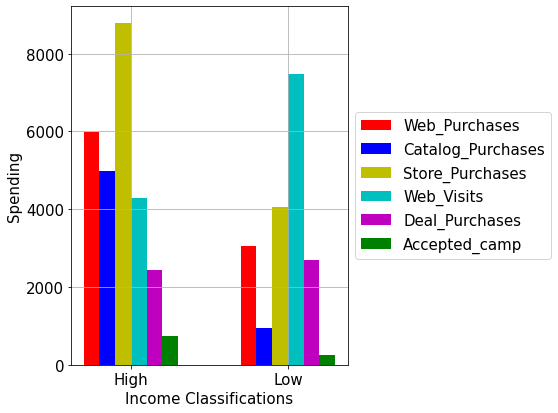

In [95]:
# plot classification groups versus place of purchaes and others
plt.rc('font', size=15)

plot_list = ['Web_Purchases','Catalog_Purchases','Store_Purchases','Web_Visits','Deal_Purchases','Accepted_camp']
x = np.arange(2)
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
plt1 = ax.bar(x - 5*width/2, df2_Income_sum['Web_Purchases'], width, label='Web_Purchases', color='r')
plt2 = ax.bar(x - 3*width/2, df2_Income_sum['Catalog_Purchases'], width, label='Catalog_Purchases', color='b')
plt3 = ax.bar(x - 1*width/2, df2_Income_sum['Store_Purchases'], width, label='Store_Purchases', color='y')
plt4 = ax.bar(x + 1*width/2, df2_Income_sum['Web_Visits'], width, label='Web_Visits', color='c')
plt5 = ax.bar(x + 3*width/2, df2_Income_sum['Deal_Purchases'], width, label='Deal_Purchases', color='m')
plt6 = ax.bar(x + 5*width/2, df2_Income_sum['Accepted_camp'], width, label='Accepted_camp', color='g')


ax.set_xticks(x)
ax.set_xticklabels(df2_Income_sum['Income'])
ax.set_xlabel('Income Classifications')
ax.set_ylabel('Spending')
# ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.grid()
plt.savefig('Others_Classificatio.png', bbox_inches='tight', dpi=300)


# --------------------------------- Thank you very much! ------------------------------------------